In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_908/3465571729.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  im

In [2]:
import json

In [3]:
# file = (pd.read_json("santacruz_auxiliary_lane.geojson"))

In [4]:
# file

In [5]:
# import json
# with open('project_location2.json') as json_file: 
#     data = json.load(json_file) 
# print(data['polygons'][0]['geometry']['coordinates'][0])

In [6]:
## error reading due to len of arrays not matching
# line = pd.read_json("eb_greenway_files/project_location.json")

#### Project to Shape file

In [7]:
multimodal_street = gpd.read_file('santacruz_multimodal_street.geojson')

In [8]:
multimodal_street

,geometry
0,"POLYGON ((-121.87154 36.97216, -121.87173 36.9..."


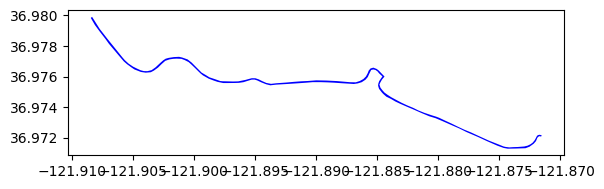

In [9]:
ax = multimodal_street.plot(color='blue')

In [10]:
# multimodal_street.to_file('sc_multimodal_street.shp')  

In [11]:
bikeped_overcrossing = gpd.read_file('santacruz_bikeped_overcrossing.geojson')

In [12]:
bikeped_overcrossing

,geometry
0,"MULTILINESTRING ((-121.91180 36.97533, -121.90..."


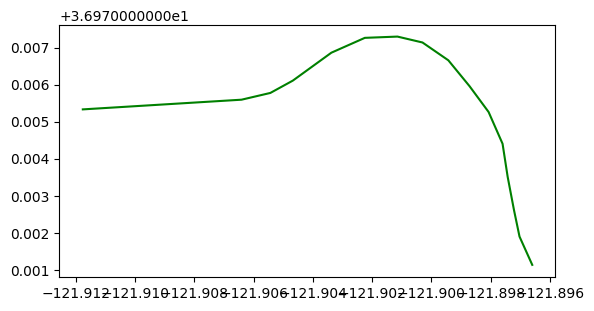

In [13]:
ax2 = bikeped_overcrossing.plot(color="green")

In [14]:
# bikeped_overcrossing.to_file('sc_bikeped_overcrossing.shp')  

In [15]:
auxiliary_lane = gpd.read_file('santacruz_auxiliary_lane.geojson')

In [16]:
auxiliary_lane

,geometry
0,"MULTILINESTRING ((-121.88405 36.97408, -121.88..."


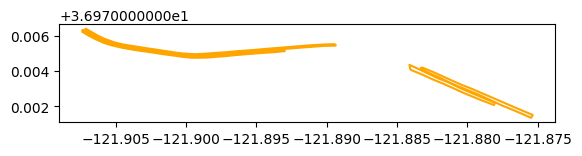

In [17]:
ax3 = auxiliary_lane.plot(color="orange")

In [18]:
# proj3.to_file('sc_auxiliary_lane.shp')  

In [19]:
bus_on_shoulder = gpd.read_file('santacruz_bus_on_shoulder.geojson')

In [20]:
bus_on_shoulder

,geometry
0,"MULTILINESTRING ((-121.89204 36.97521, -121.89..."


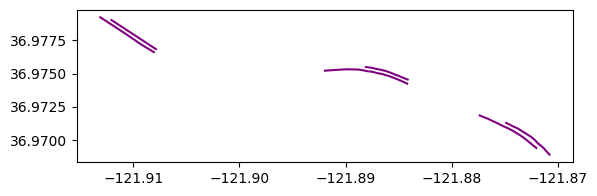

In [21]:
ax4 = bus_on_shoulder.plot(color="purple")

In [22]:
# bus_on_shoulder.to_file('sc_bus_on_shoulder.shp')  

#### Concat Project locations

In [23]:
#### for bike ped
proj_bike_ped = gpd.GeoDataFrame(pd.concat([multimodal_street, bikeped_overcrossing]))

<AxesSubplot:>

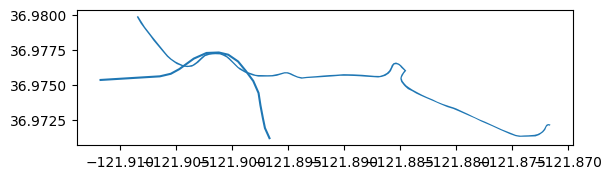

In [24]:
proj_bike_ped.plot()

In [69]:
# proj_bike_ped.to_file('sc_proj_bike_ped.shp')  

In [25]:
## for car 

proj_car = gpd.GeoDataFrame(pd.concat([multimodal_street, auxiliary_lane]))

<AxesSubplot:>

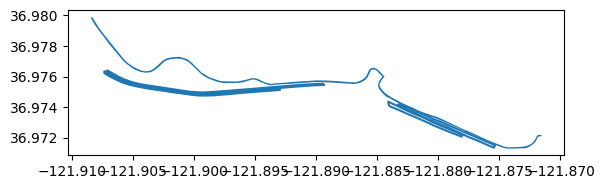

In [26]:
proj_car.plot()

In [64]:
# proj_car.to_file('sc_proj_car.shp')  

In [58]:
## for transit

proj_transit = gpd.GeoDataFrame(pd.concat([multimodal_street, bus_on_shoulder]))

<AxesSubplot:>

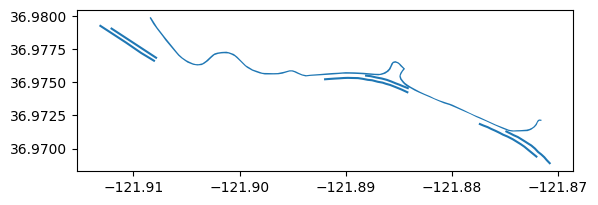

In [59]:
proj_transit.plot()

In [60]:
# proj_transit.to_file('sc_proj_transit.shp')  

### Get Routes from GTFS Data

In [30]:
import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(800_000_000_000) ## 800GB?

In [31]:
from shared_utils import gtfs_utils_v2
from shared_utils import gtfs_utils
from shared_utils import geography_utils
import datetime
from siuba import *

In [32]:
analysis_date = datetime.date(2022, 11, 28)

In [33]:
FEED = '02fbd8719f99b906e65b2cf86cbb7cae'


In [34]:
keep_shape_cols = [
       "feed_key", "activity_date", 
       "shape_id", "shape_array_key",
       "n_trips"]

In [46]:
test_feed_keys = [
    "02fbd8719f99b906e65b2cf86cbb7cae", # Santa Cruz Schedule
    # "f8d3bfd9e780aa3b3ce1340b2116513f" # Long Beach Schedule
]
test_cases = [
    "Santa Cruz", 
    # "Metrolink Schedule"
]

In [36]:
# def display_outputs(df):
#     display(df.head())
#     print(f"shape: {df.shape}")
#     print(f"columns: {df.columns}")
    
#     if isinstance(df, gpd.GeoDataFrame):
#         print(f"CRS: {df.crs}")

In [37]:
# df_filter_by_name = (
#     gtfs_utils_v2.schedule_daily_feed_to_organization(
#         selected_date = analysis_date,
#         keep_cols = None,
#         get_df = False
#     ) >> gtfs_utils_v2.filter_operator(test_cases, include_name = True)
#     >> collect()
# )


In [38]:
# df_filter_by_name

In [54]:
shapes = gtfs_utils_v2.get_shapes(
    selected_date = analysis_date,
    operator_feeds = test_feed_keys,
    shape_cols = ["feed_key", "shape_id", "shape_array_key",
                 "n_trips"],
    get_df = True,
    crs = "EPSG:3310",
)

/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'GEOGRAPHY' of column 'pt_array'


In [55]:
shapes

,feed_key,shape_id,shape_array_key,n_trips,geometry
0,02fbd8719f99b906e65b2cf86cbb7cae,350073,6b6b5e540abfd7c534ea2aab75117f87,1,"LINESTRING (-185470.812 -95192.760, -185479.31..."
1,02fbd8719f99b906e65b2cf86cbb7cae,350084,5d133e126244f825379bb0b6d9ff1b10,1,"LINESTRING (-188298.722 -96873.513, -188301.96..."
2,02fbd8719f99b906e65b2cf86cbb7cae,350034,34322dc04ea0f4aa70aaaf5059c519bf,1,"LINESTRING (-188298.722 -96873.513, -188301.96..."
3,02fbd8719f99b906e65b2cf86cbb7cae,350067,995941e075ee891a866bd7d69f5cf880,1,"LINESTRING (-184682.089 -104159.840, -184682.6..."
4,02fbd8719f99b906e65b2cf86cbb7cae,74S0004,85a29b24b386a0feb3d6fc90c2294fb6,1,"LINESTRING (-156602.745 -121551.079, -156584.8..."
5,02fbd8719f99b906e65b2cf86cbb7cae,74S0003,ab8ee62afdc185dc11a5df12edc005d0,1,"LINESTRING (-156602.745 -121551.079, -156584.8..."
6,02fbd8719f99b906e65b2cf86cbb7cae,660011,83ac025461fa9e3d70693faa7a13854c,1,"LINESTRING (-174775.662 -113900.251, -174774.2..."
7,02fbd8719f99b906e65b2cf86cbb7cae,350087,3f6a5124f4180eb7f31cc7f1af7634d6,1,"LINESTRING (-190183.875 -89076.487, -190184.09..."
8,02fbd8719f99b906e65b2cf86cbb7cae,350033,b5735fd62d2115c66518de7efdb91304,1,"LINESTRING (-188312.457 -96947.922, -188345.47..."
9,02fbd8719f99b906e65b2cf86cbb7cae,350071,4a16ac936ef04254c3c8d32b520fb82d,1,"LINESTRING (-190183.875 -89076.487, -190184.09..."


<AxesSubplot:>

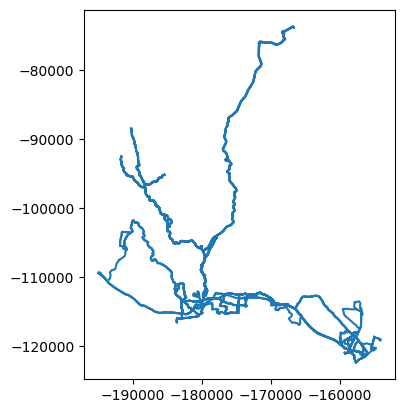

In [56]:
shapes.plot()

In [43]:
## raises an error
# gdf = gtfs_utils.get_route_shapes(selected_date = analysis_date, itp_id_list=296, get_df = True)
# #    



#### Project 210 Median Shapefile

In [12]:
proj_210median = gpd.read_file('210_files/210median.geojson')

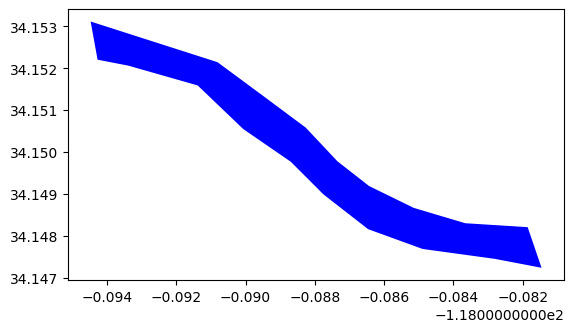

In [13]:
ax = proj_210median.plot(color='blue')

In [14]:
# proj_210median.to_file('proj_210median.shp')  